In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

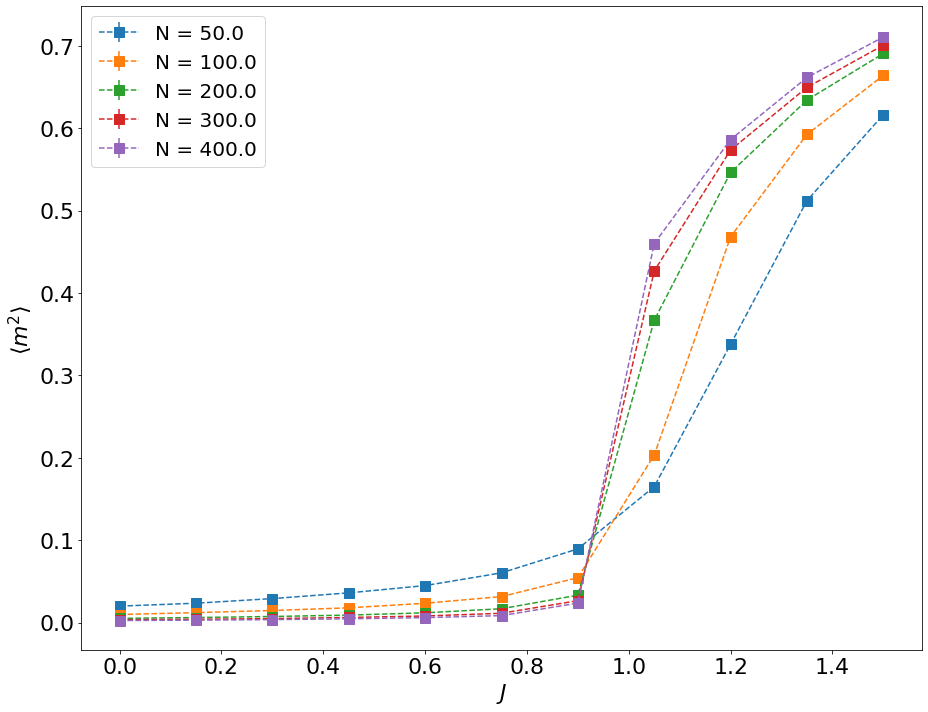

In [2]:
#data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP_3D/Results/Short/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    #print(1/bc)
    #print( (2/data_l[:,19])**0.5 )
    errs = data_l[:,18]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_magnetization2_shortchains.png", bbox_inches='tight')

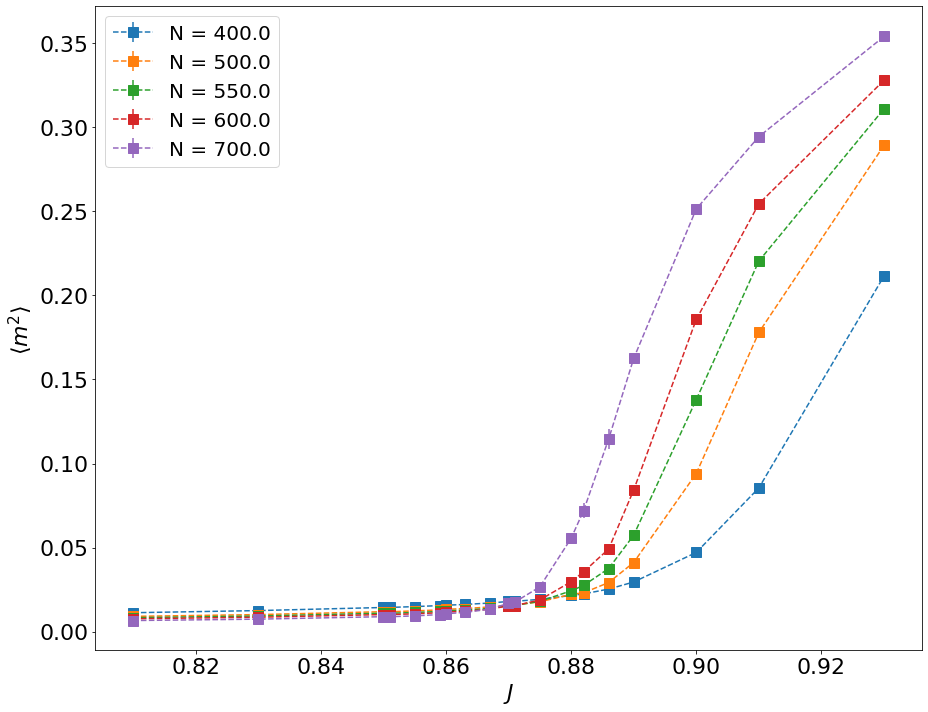

In [2]:
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
for l in lengths:   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,17]
    errs = data_l[:,18]
    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_magnetization2_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/3_magnetization2_longchains.png", bbox_inches='tight')

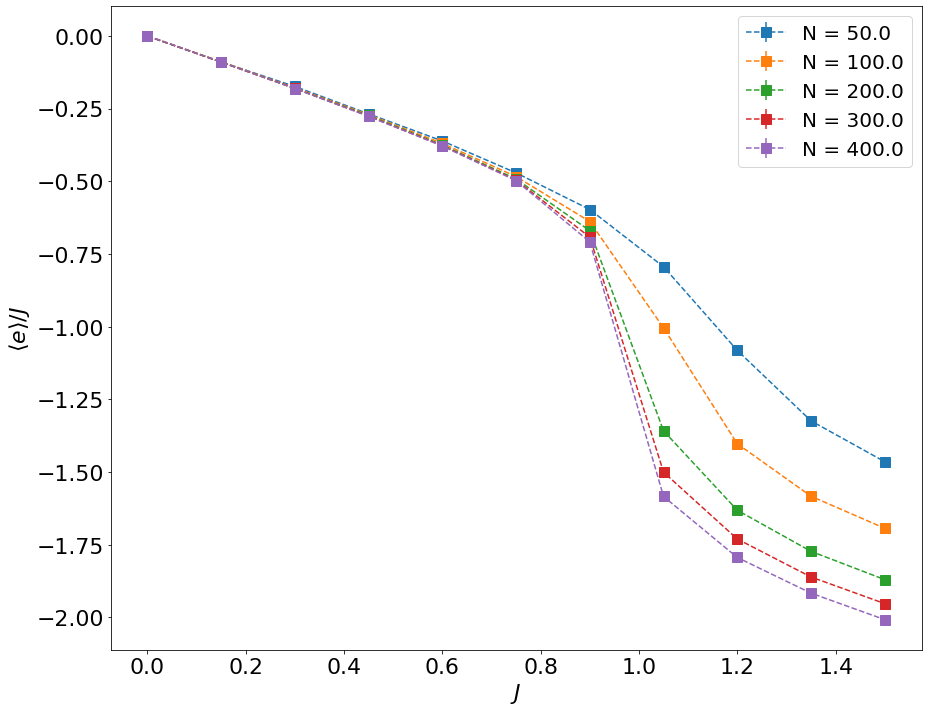

In [4]:
#data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP_3D/Results/Short/LongChains.txt", skiprows=0)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_energy_shortchains.png", bbox_inches='tight')

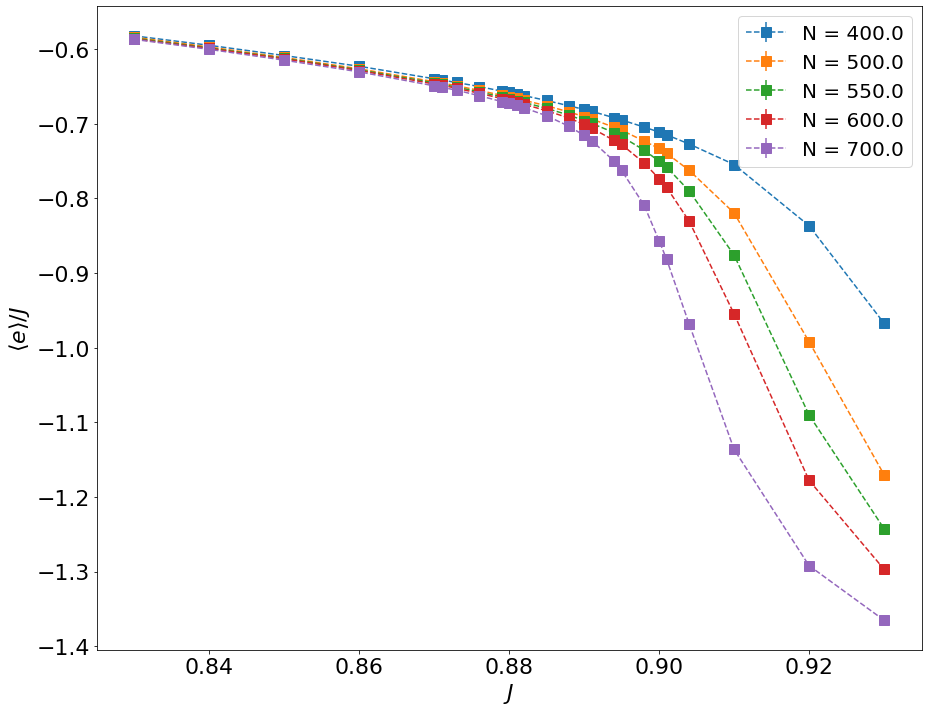

In [5]:
data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/3_energy_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/3_energy_longchains.png", bbox_inches='tight')

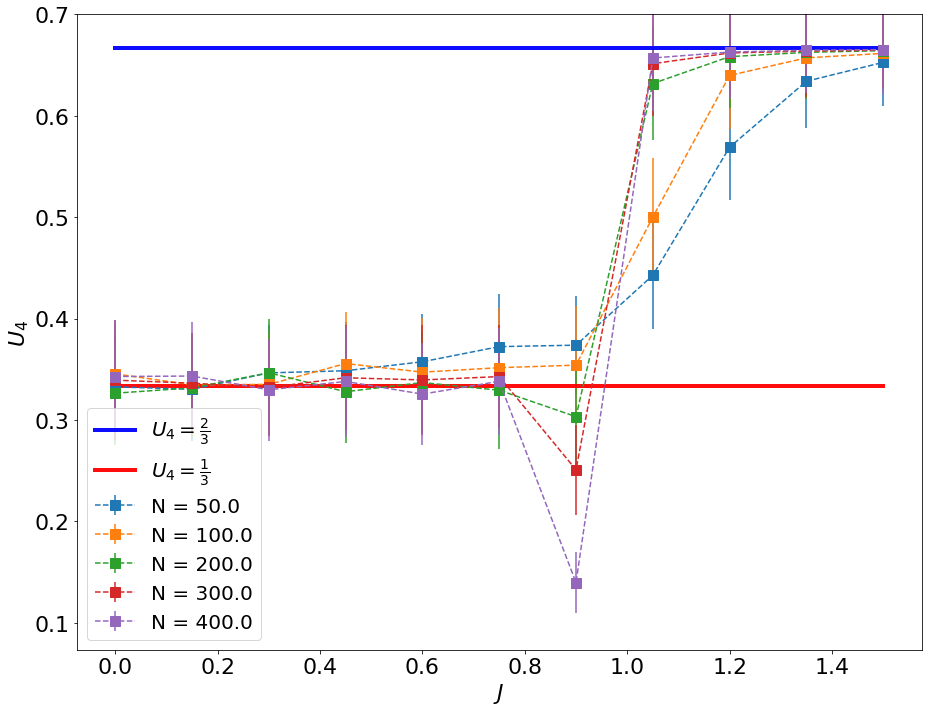

In [8]:
#data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP_3D/Results/Short/LongChains.txt", skiprows=0)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = data_np[data_np[:,1]<=1.75]

for l in lengths:
    if l==10000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    #print(bc)
  
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
    
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$U_4=\frac{2}{3}$", c="b",lw=4, alpha=0.95)

plt.plot([J_l[0], J_l[-1]], [1/3, 1/3], "-", label=r"$U_4=\frac{1}{3}$", c="r",lw=4, alpha=0.95)
 
    
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(1/3 -0.26, 0.7)

plt.legend(loc="best", fontsize=20) 

plt.tight_layout()

plt.savefig("Thesis/Images/3_bindercumulants_shortchains.png", bbox_inches='tight')

[0.61055443 0.61166029 0.6019932  0.60271584 0.59613784 0.57734712
 0.51689247 0.01262267 0.04332631 0.11712691 0.16301496] [0.00418062 0.00371215 0.00207753 0.00369935 0.00110145 0.00091374
 0.00527099 0.03923718 0.03087062 0.02343535 0.0197285 ]


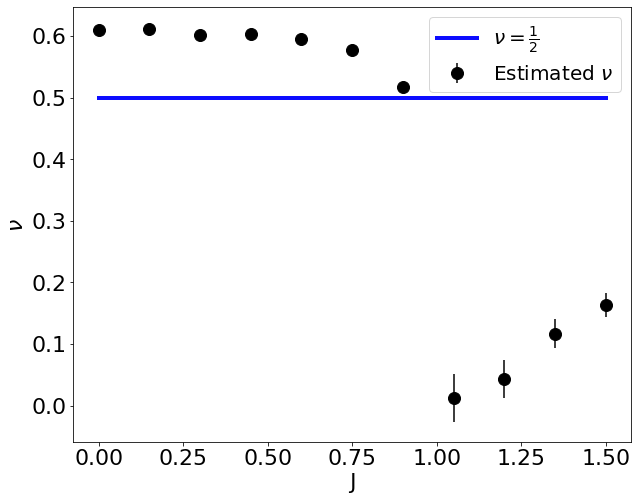

In [7]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP_3D/Results/Short/LongChains.txt", skiprows=0)


J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    #data_l = data_l[data_l[:,0]>99]
    #data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [1/2, 1/2], "-", label=r"$\nu=\frac{1}{2}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18
print(v, sigmas)
#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
plt.savefig("Thesis/Images/3_nu_shortchains.png", bbox_inches='tight')    

[0.56416349 0.55638761 0.54842807 0.54027217 0.53205714 0.52871445
 0.52819135 0.51547269 0.51937552 0.50865011 0.51397782 0.50592087
 0.4949012  0.48778699 0.47188253 0.467703   0.44119671 0.43220856
 0.39190768 0.36657166] [0.00122107 0.00032581 0.0012143  0.00130428 0.00131727 0.00055352
 0.00129199 0.00069473 0.00232827 0.0019644  0.00296157 0.000736
 0.00310037 0.00535663 0.00688511 0.00703716 0.00997507 0.01242143
 0.01965703 0.02836251]


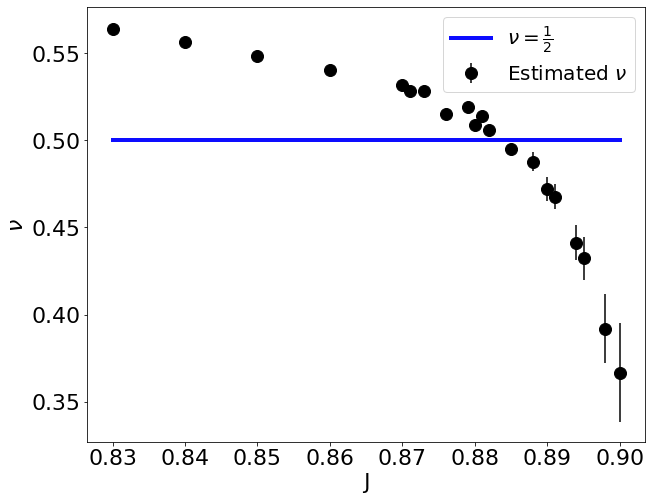

In [2]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)

J_min = 0.84
J_max = 0.9
data_np = data_np[data_np[:,1]<=J_max]
#data_np = data_np[data_np[:,1]>=J_min]



J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
 
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [1/2, 1/2], "-", label=r"$\nu=\frac{1}{2}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18
print(v, sigmas)
#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
plt.savefig("Thesis/Images/3_nu_shortchains_deep.png", bbox_inches='tight')    

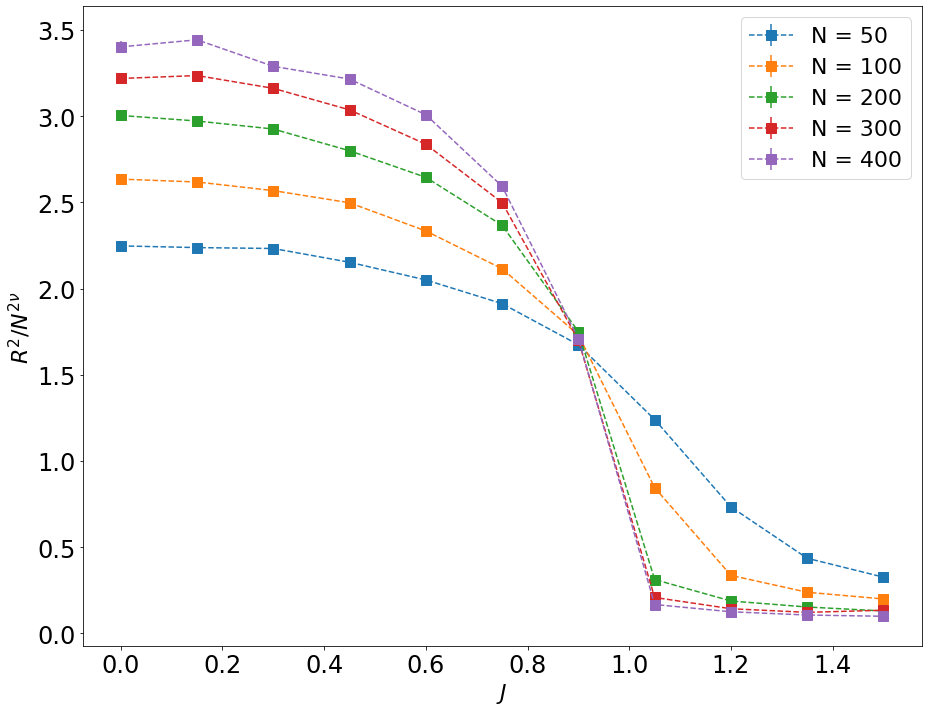

In [9]:
#data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP_3D/Results/Short/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<=1.75]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
nu=1/2
for l in lengths:
    if (l==10000):
        continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))

 
    
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.25, 1.45)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/3_rscaling_shortchains.png", bbox_inches='tight')

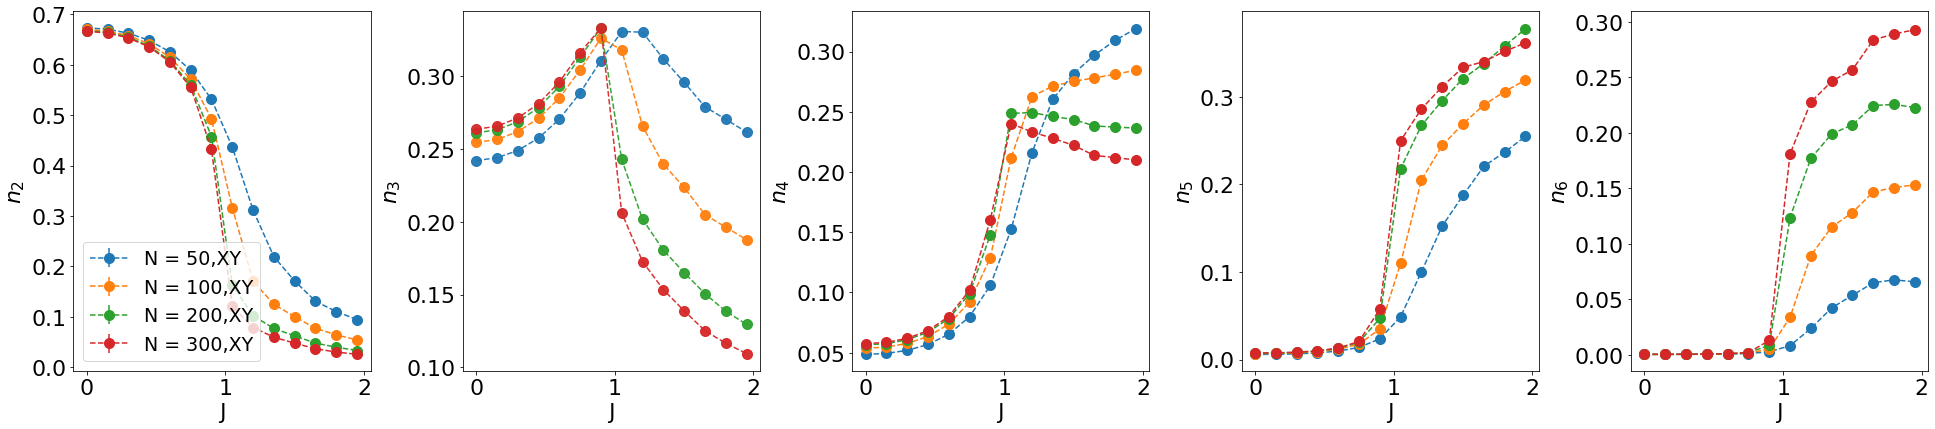

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(27,6)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("CPP_3D/Results/Iteration00/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    #if (l==100 or l ==400): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[1].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], alpha = 0.95, fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[2].errorbar(J_l, data_l[:,26], yerr=data_l[:,27], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
    axes[3].errorbar(J_l, data_l[:,28], yerr=data_l[:,29], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    axes[4].errorbar(J_l, data_l[:,30], yerr=data_l[:,31], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
     
axes[0].set_ylabel(r'$n_2$', fontsize=22)    
axes[1].set_ylabel(r'$n_3$', fontsize=22)    
axes[2].set_ylabel(r'$n_4$', fontsize=22)  
axes[3].set_ylabel(r'$n_5$', fontsize=22)  
axes[4].set_ylabel(r'$n_6$', fontsize=22)  

axes[0].legend(fontsize = 19)
#axes[1].legend(fontsize = 10)
#axes[2].legend(fontsize = 11)


for i in range(5):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22) 
    axes[i].tick_params(axis='y', labelsize=22) 
    
    
plt.tight_layout()

plt.savefig("Thesis/Images/3_bulk_shortchains.png", bbox_inches='tight')

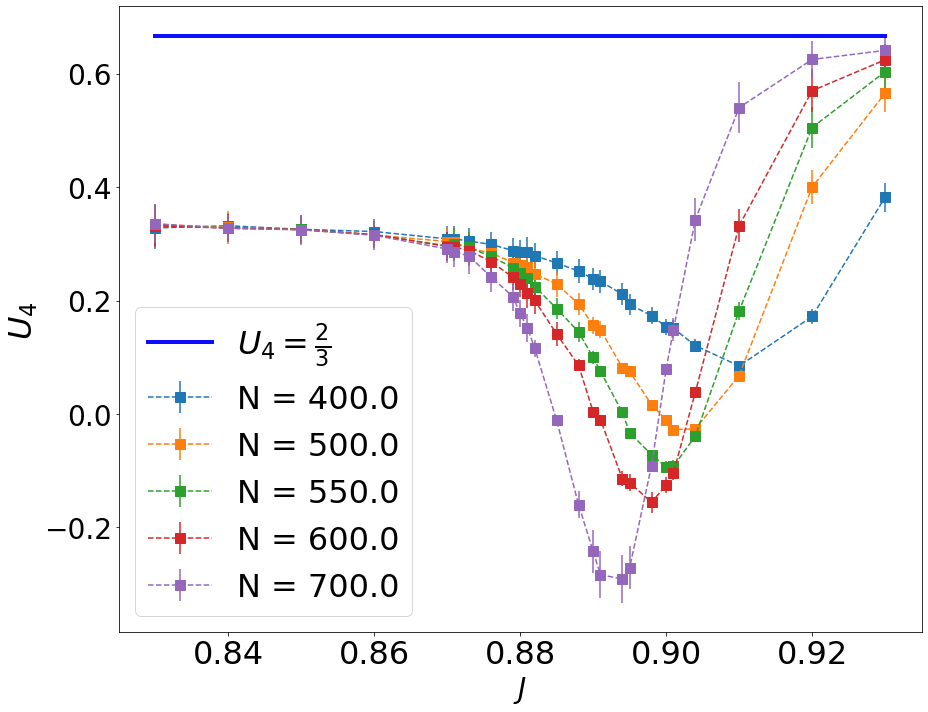

In [6]:
data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    if l==10000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]        
    J_l = data_l[:, 1]    
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
   
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$U_4=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 28)
plt.ylabel(r"$ U_4 $ ", fontsize=32)
plt.tick_params(axis='x', labelsize=32) 
plt.tick_params(axis='y', labelsize=28) 
#plt.ylim(1/3 -0.16, 0.7)



plt.legend(loc="best", fontsize=32)
 
 

plt.tight_layout()

plt.savefig("Thesis/Images/3_bindercumulants_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/3_bindercumulants_longchains.png", bbox_inches='tight')

In [14]:
data_l[:,1]

array([0.83 , 0.84 , 0.85 , 0.86 , 0.87 , 0.871, 0.873, 0.876, 0.879,
       0.88 , 0.881, 0.882, 0.885, 0.888, 0.89 , 0.891, 0.894, 0.895,
       0.898, 0.9  , 0.901, 0.904, 0.91 , 0.92 , 0.93 ])

/var/folders/cf/kjwknm9n4zj3gkvp12xwk4yh0000gn/T/ipykernel_8819/165960097.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


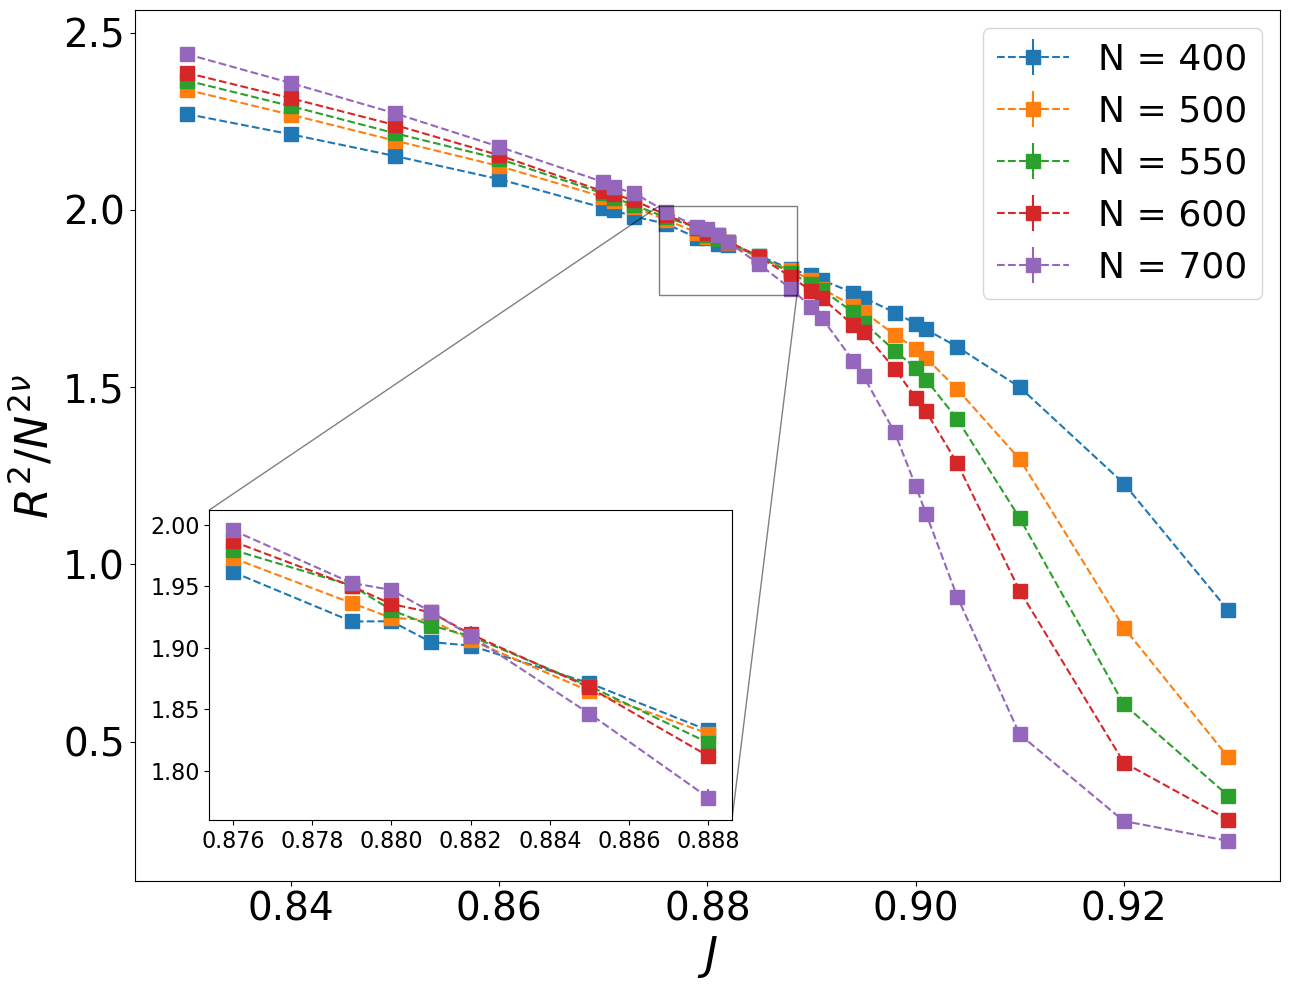

In [10]:
data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=1/2

l, b, h, w = .16485, .175, .31, .402
ax2 = fig.add_axes([l, b, w, h])
J_min = 0.875
J_max = 0.888
for l in lengths:
    if (l==10000):
        continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    ax.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    data_l = data_l[data_l[:,1]<=J_max]
    data_l = data_l[data_l[:,1]>=J_min]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    bc = r_l/np.power(l, 2*nu)
    errs = data_l[:, 4]/np.power(l, 2*nu)    
    ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
ax.set_xlabel(r'$J$', fontsize = 32)
ax.set_ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=32)
ax.tick_params(axis='x', labelsize=28) 
ax.tick_params(axis='y', labelsize=28) 
#plt.xlim(1.25, 1.45)
#plt.ylim(0.1, 4.5)
ax2.tick_params(axis='x', labelsize=16) 
ax2.tick_params(axis='y', labelsize=16) 
#ax2.set_xlim(J_min, J_max)

ax.legend(fontsize=26)

#plt.grid()

ax.indicate_inset_zoom(ax2, edgecolor="black")
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("../XY/img/3_rscaling_longchains.png", bbox_inches='tight')

#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/3_rscaling_longchains.png", bbox_inches='tight')

In [13]:
J_l

array([0.87 , 0.871, 0.873, 0.876, 0.879, 0.88 , 0.881, 0.882, 0.885,
       0.888, 0.89 ])

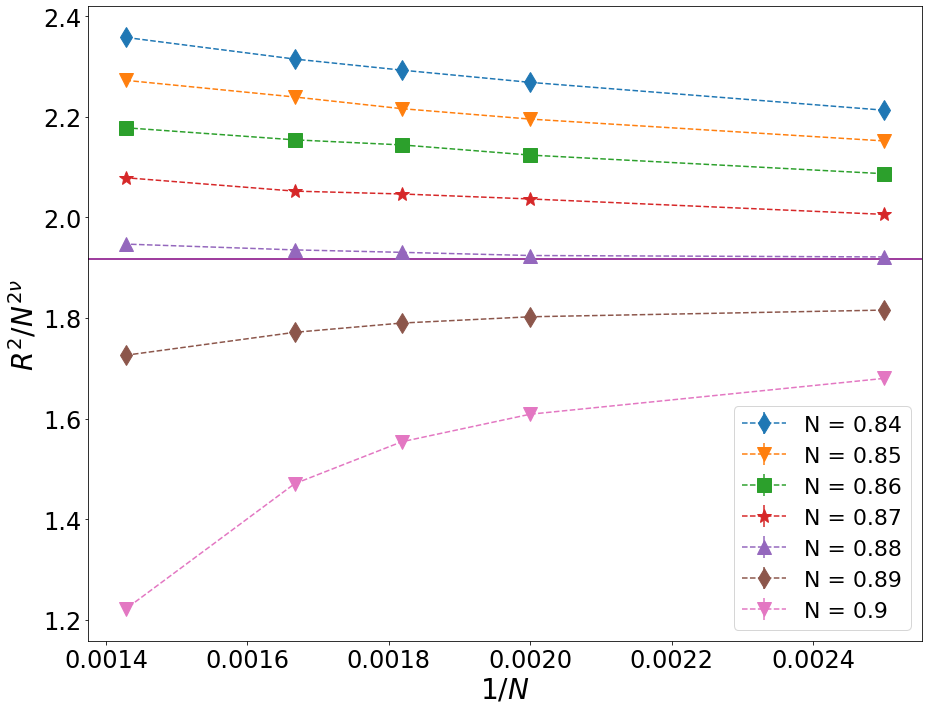

In [11]:
data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=1/2
 
markers = ["d", "v", "s", "*", "^", "d", "v", "s", "*", "^"]   
    
lengths = [0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9  ]
i = 0
for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt=markers[i]+"--", ms = 14, label = "N = " + str((l)))
    
    i+=1
 
data_np = np.loadtxt("CPP_3D/Results/LongerIteration1/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
 

nu=1/2

 

plt.axhline(1.918266947965852, c ="purple") 

plt.xlabel(r'$1/N $', fontsize = 28)
plt.ylabel(r"$ R ^2/N^{ 2\nu} $ ", fontsize=28)

#plt.xscale("log")
#plt.yscale("log")


plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

 
#plt.grid()
plt.tight_layout()
 
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchainscross_3D.png", bbox_inches='tight')

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/rscaling_longchainscross_3D.png", bbox_inches='tight')

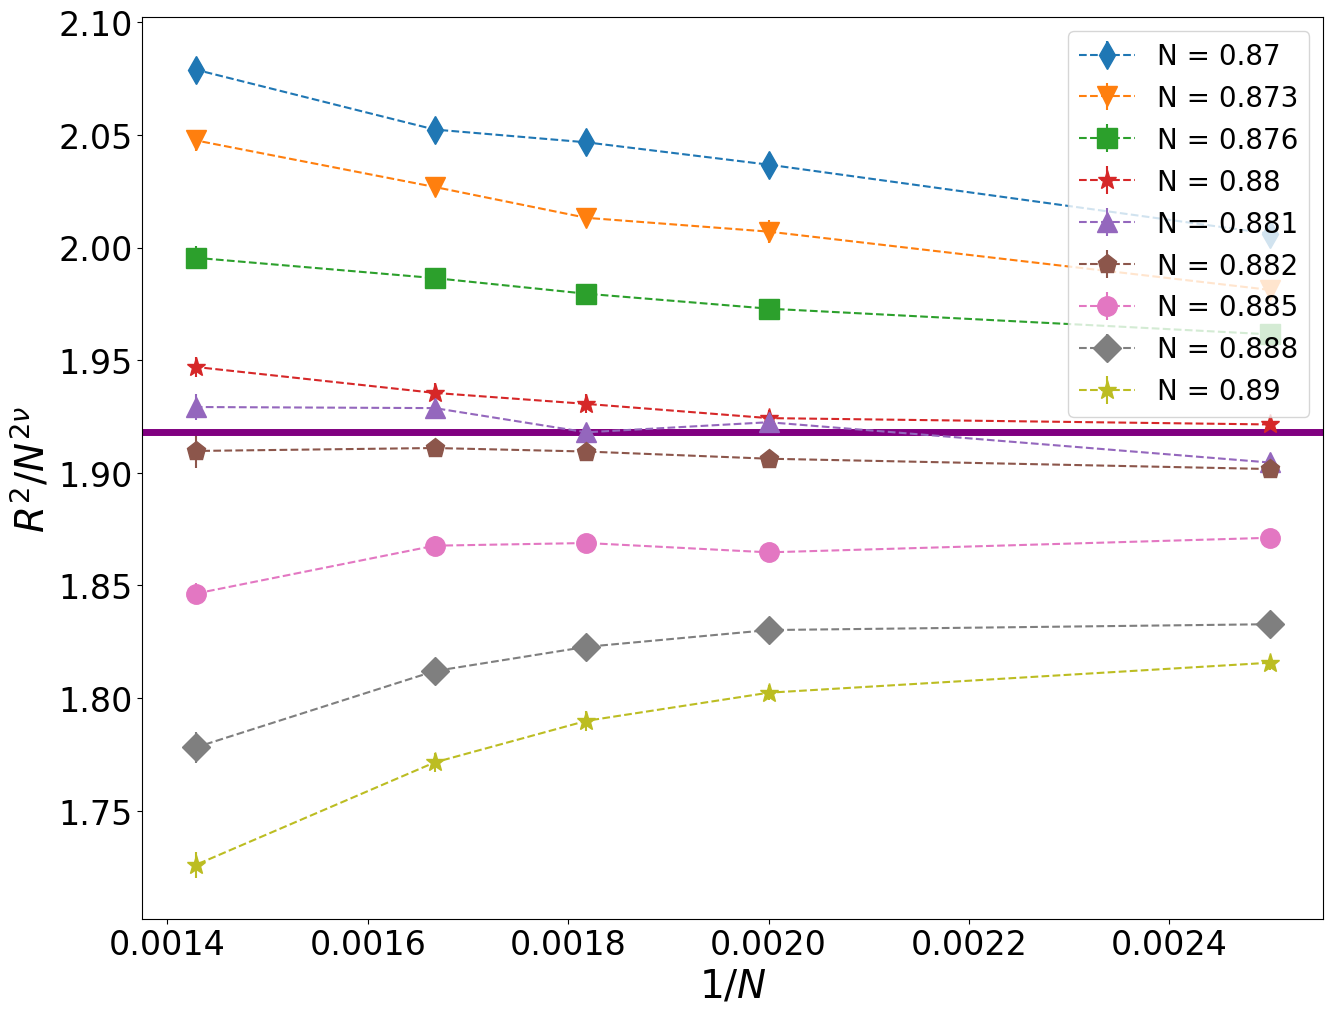

In [5]:
data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])

import matplotlib.ticker

matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0


fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=1/2

markers = ["d", "v", "s", "*", "^", "p", "o", "D", "*", "^"]

lengths = [0.87, 0.873, 0.876, 0.88, 0.881, 0.882, 0.885, 0.888, 0.89  ]
i=0
for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

     
    plt.errorbar(1/J_l, bc, yerr=errs, fmt=markers[i]+"--", ms = 14, label = "N = " + str((l)))
    
    i+=1
 
plt.axhline(1.918266947965852, c ="purple", lw=5) 

plt.xlabel(r'$1/N $', fontsize = 28)
plt.ylabel(r"$ R ^2/N^{ 2\nu} $ ", fontsize=28)
 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=20)

#plt.xscale("log")
#plt.yscale("log")
#plt.grid()
plt.tight_layout()

plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 


#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
#plt.savefig("Thesis/Images/rscaling_longchainscross_3D_deep.png", bbox_inches='tight')

plt.savefig("../XY/img/rscaling_longchainscross_3D_deep.png", bbox_inches='tight')

[400, 500]
[400, 600]
[600, 700]
[400, 700]


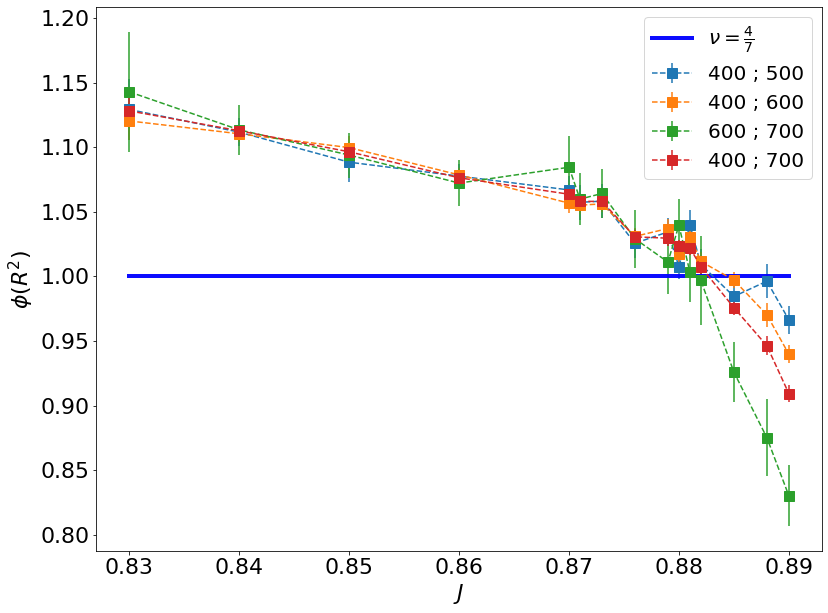

In [6]:
#data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

J_min = 0.7
J_max = 0.89
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
 
    
pairs = [[400,500], [400,600], [600,700], [400,700]]


fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


c = 0 
 

L_plot = []
BC_plot = []
err_plot = []
J_plot = []
J_err_plot = []

J_l1 = np.unique(data_np[:, 1])

for pair in pairs:
    
     
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    #print(data_l1)
    if(len(data_l1)<2): continue
    if(len(data_l2)<2): continue
        
    print(pair)
        
    bc = []
    errs=[]
    J_plot = []
 
    for J in J_l1 :

        if (len(data_l1[data_l1[:,1]==J])==0): continue
        if (len(data_l2[data_l2[:,1]==J])==0): continue

        data_l = data_l1[data_l1[:,1]==J]             
        ind = np.argmin(data_l[:, 16])
        data_l = data_l[ind, :]
        r1 = norm.rvs(data_l[3], data_l[4], size =  100)
        #r1 = norm.rvs(np.sqrt(data_l[3]), 0.5*data_l[4]/data_l[3]*np.sqrt(data_l[3]), size =  100)

        data_l = data_l2[data_l2[:,1]==J]             
        ind = np.argmin(data_l[:, 16])
        data_l = data_l[ind, :]         
        r2 = norm.rvs(data_l[3], data_l[4], size =  100)
        #r2 = norm.rvs(np.sqrt(data_l[3]), 0.5*data_l[4]/data_l[3]*np.sqrt(data_l[3]), size =  100)

        x = np.log(pair[1]/pair[0])
        y = np.log( r2/r1  )/x   

        #if ( J <=1.38 and np.std(y)>0.085 ) :continue
        #if(np.std(y)>0.105):continue
        
        bc.append(np.mean(y))
        errs.append(np.std(y))
        J_plot.append(J)
 

    plt.errorbar(J_plot, bc, yerr=errs, fmt="s--", ms = 10, label = str(pair[0])+ " ; " +str(pair[1]) )
 
data_np = np.loadtxt("CPP_3D/Results/Long/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)

data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]
J_l1 = np.unique(data_np[:, 1])
plt.plot([np.min(J_l1),np.max(J_l1)], [2/2, 2/2], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)


ax.set_xlabel(r"$ J $", fontsize = 22)
ax.set_ylabel(r"$ \phi(R^2)$ ", fontsize=22)

plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.legend(loc="best", fontsize=20)